<a href="https://colab.research.google.com/github/gonzalovaldenebro/NaturalLanguageProcessing-Portfolio/blob/main/F2_3_QuestionAnswering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 195: Natural Language Processing
## Question Answering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F2_3_QuestionAnswering.ipynb)


## References

Hugging Face Task Guide on Question Answering: https://huggingface.co/docs/transformers/tasks/question_answering


## Installing necessary modules

In [1]:
import sys
!{sys.executable} -m pip install transformers datasets evaluate rouge_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.9 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=db610d8e129464cb0b8c57d0a49ba37db68cef9faf95a70864b4a998ad74e765
  Stored in directory: /Users/gonzalovaldenebro/Library/Caches/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


## Question Answering

[roberta-based model](https://huggingface.co/deepset/roberta-base-squad2) trained on the [SQuAD2.0](https://huggingface.co/datasets/squad_v2) question answering data set

Requires two inputs
* a question
* context - where to find the answer

Returns
* an answer
* a location where you can find the answer in the context

In [3]:
times_delphic_story = """
How does the Supreme Court ruling on affirmative action affect Drake?
The answer has little to do with affirmative action.
Over the summer, the Supreme Court ruled against the admissions programs of Harvard University and the University of North Carolina in an affirmative action decision. Before the decision, race already wasn’t a factor in Drake University admissions, according to Provost Sue Mattison.
“Affirmative action, with regards to admissions, only impacts those really highly selective institutions that limit the number of incoming students,” Mattison said. “So that doesn’t apply to Drake and most institutions across the country.”
She said schools like Harvard and UNC have enough applicants that they can pick and choose which applicants fill a certain number of spots.
Drake’s admissions team found that the university has “admitted all students who have a 3.0 high school GPA or [higher],” Mattison said. “Even though we’ve asked for a person’s race on the admissions form, it does not have an impact on the admissions decision, and it doesn’t displace anybody.”
Possible effects of the court’s ruling
Mark Kende, director of Drake’s Constitutional Law Center, said the Supreme Court “basically has embraced an idea that it calls colorblindness.”
“If you take their principle of colorblindness and extend it beyond universities, to other places, it could raise some problems,” Kende said. “But we don’t know yet.”
Financial aid programs that prioritize applicants of a particular race over another are more vulnerable after the court’s decision, according to Kende. He said it’s not clear what impact the decision might have on university hiring practices that consider an employee’s race, as well as corporations’ diversity programs.
Following the Supreme Court’s decision, Missouri Attorney General Andrew Bailey said Missouri institutions subject to the U.S. Constitution or Title VI must stop using race-based standards “to make decisions about things like admissions, scholarships, programs and employment.”
The University of Missouri System said that “a small number of our programs and scholarships have used race/ethnicity as a factor for admissions and scholarships,” and that “these practices will be discontinued.”
Drake is taking a different approach in the wake of the affirmative action decision. The university is monitoring maybe about forty to fifty scholarships, according to Ryan Zantingh, Drake’s director of financial aid. This is more in anticipation of a comparable case on financial aid that considers race, rather than a reaction to the affirmative action ruling.
Mattison said she thinks Drake is still trying to determine how the Supreme Court decision will impact Drake’s Crew Scholars program, which is for incoming students of color.
“There are ways that we can ensure that we continue Crew Scholars while still being compliant,” Mattison said.
Donors for some Drake scholarships specified that they wanted to support a student of color or a woman in a STEM field, Mattison said.
“And so we’re still working through what that actually means, and what we have to do to continue to achieve the values that we expect,” Mattison said. “There are ways that we can change the wording of some of the scholarships.”
Like all students, students of color may qualify for scholarships for first-generation students or students with financial need.
“There’s a lot of overlap between students of color and other areas where financial aid is directed,” Zantingh said. “Scholarship resources can be directed [to financial need or first generation status] and still reach the same students.”
Even if there is a ruling on financial aid that’s comparable to the affirmative action decision, Zantingh doesn’t expect a large impact on Drake financial aid from either decision.
“There may be some implications, but I think the overall general effect on students will be little to none,” Zantingh said.
Zantingh gave an example of scholarship language offered by legal counsel. If a scholarship is for only minority students, it might become a scholarship that gives preference to students who demonstrate a commitment to Drake’s vision for diversity on campus.
“If a white student is actively involved in anti-racist leadership here on campus, certainly they would fit that description then, wouldn’t they?” Zantingh said. “Basically, the language would not seek to exclude any particular protected class categorically.”
In some cases, a donor might be unwilling to change the scholarship’s language or be deceased, Zantingh said. If a donor is deceased, a judge might approve changes. He said he doesn’t expect Drake to cut any of the scholarships it is monitoring.
“The scholarship criteria would have to change, or the dollars would have to be repurposed in another way. Per either the donor or a court’s approval,” Zantingh said.
Race can still play a role in college admissions
The Supreme Court left at least one legal path open for race to play a role in college admissions.
When admitting students, universities are allowed to consider “an applicant’s discussion of how race affected his or her life, be it through discrimination, inspiration or otherwise,” Chief Justice John Roberts wrote in the Court’s decision. However, “the student must be treated based on his or her experiences as an individual — not on the basis of race.”
A student’s story can emerge without Drake asking for it, according to Dean of Admissions Joel Johnson.
“Especially if they’ve overcome a lot, or it’s so key to their identity… it’ll come out on its own,” Johnson said. “I don’t know if I could say the Supreme Court protected it. They couldn’t have stopped it, honestly.”
Johnson said that caring about diversity also means intentionally recruiting a diverse group of students. He said students can’t join Drake if they never apply in the first place.
In the wake of the Supreme Court’s decision on affirmative action, The Times-Delphic is publishing a series. Check next week’s paper for an article about legacy admissions and legacy financial aid with a Drake focus.

"""

In [4]:
from transformers import pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Can colleges take race into account when making admissions decisions?',
    'context': times_delphic_story
}
res = nlp(QA_input)
print(res)

{'score': 0.10679273307323456, 'start': 1414, 'end': 1431, 'answer': 'we don’t know yet'}


In [5]:
print( times_delphic_story[1416:1433] )
print( times_delphic_story[1200:1500] )

 don’t know yet.”
urt “basically has embraced an idea that it calls colorblindness.”
“If you take their principle of colorblindness and extend it beyond universities, to other places, it could raise some problems,” Kende said. “But we don’t know yet.”
Financial aid programs that prioritize applicants of a particular 


### Let's try another question

In [6]:
QA_input2 = {
    'question' : "Which kinds of schools are most affected by the Supreme Court's affirmative action ruling?",
    'context': times_delphic_story
}
res = nlp(QA_input2)
print(res)

{'score': 0.030723299831151962, 'start': 670, 'end': 685, 'answer': 'Harvard and UNC'}


In [8]:
print( times_delphic_story[671:686] )
print( times_delphic_story[500:800] )

arvard and UNC 
institutions that limit the number of incoming students,” Mattison said. “So that doesn’t apply to Drake and most institutions across the country.”
She said schools like Harvard and UNC have enough applicants that they can pick and choose which applicants fill a certain number of spots.
Drake’s admi


The answer I was hoping for was `"highly selective institutions"`.

### How you ask the question seems to have an impact on the answer it finds

In [9]:
QA_input3 = {
    'question' : "Does Drake consider race when deciding to admit a student?",
    'context': times_delphic_story
}
res = nlp(QA_input3)
print(res)

{'score': 0.09959004074335098, 'start': 1414, 'end': 1431, 'answer': 'we don’t know yet'}


In [10]:
QA_input4 = {
    'question' : "At Drake, does race have an impact on the admissions decision?",
    'context': times_delphic_story
}
res = nlp(QA_input4)
print(res)

{'score': 0.10402802377939224, 'start': 994, 'end': 1047, 'answer': 'it does not have an impact on the admissions decision'}


## Discussion question:

What are some ways you can think of for evaluating question answering models?

I would personally think of the following techniques to evaluate the precision of the QA Models: 

**Exact Match (EM) Accuracy:** Measure the percentage of questions for which the model's answer is an exact match to the reference or ground truth.
 
**Precision:** Assess the proportion of correct answers among those provided by the model. It is the ratio of true positive answers to the total number of answers given by the model.
Formula: Precision

**Recall:** Evaluate the ability of the model to capture all relevant information in its responses. It is the ratio of true positive answers to the total number of relevant answers present in the reference or ground truth.

**F1 Score:** Combine precision and recall into a single metric using the F1 score. It provides a balanced measure of a model's performance.

## Group Exercise

Find a question answering *dataset* on Hugging Face. Test out some of the examples from the data set using metrics we decided on.

## Applied Exploration

Choose a Question Answering model from Hugging Face (you may use the one we used in class). Set up an experiment to answer the following question: How does the length of the context affect the performance of the model?

Answer the following questions:
**What dataset(s) did you use (provide links)?:** I will be using the [squad_v2 dataset](https://huggingface.co/datasets/squad_v2)

**Describe the kinds of questions and answers that appear in this data. How do the lengths of the context vary? Maybe provide a histogram that describes this:**

**What metrics did you use? Why did you choose those?:**

**What were your results? Describe what you found and any additional take-aways:** 



In [11]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
from datasets import load_dataset

dataset = load_dataset("squad_v2")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [13]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 11873
    })
})


In [14]:
context = dataset["validation"]["context"][3]
context

'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.'

In [15]:
context1 = dataset["validation"]["context"][20]
context1

'The English name "Normans" comes from the French words Normans/Normanz, plural of Normant, modern French normand, which is itself borrowed from Old Low Franconian Nortmann "Northman" or directly from Old Norse Norðmaðr, Latinized variously as Nortmannus, Normannus, or Nordmannus (recorded in Medieval Latin, 9th century) to mean "Norseman, Viking".'

## Loop trough the entire validation dataset observations and test the results

In [ ]:
from transformers import pipeline

model_name = "deepset/roberta-base-squad2"
nlp = pipeline("question-answering", model=model_name, tokenizer=model_name)
x =0

for i, question in enumerate(dataset["validation"]["question"]):
  QA_input = {
      'question': question,
      'context': dataset["validation"]["context"][i]
  }
  res = nlp(QA_input)
  res
  print(f"Question {i + 1}: {question}")
  print(f"Context: {QA_input['context']}")
  print(f"Answer:  {res['answer']}")
  print(f"Score:   {res['score']}")
  print("-------------")

## Loop trough the first 10 validation dataset observations and test the results

In [17]:
from transformers import pipeline

model_name = "deepset/roberta-base-squad2"
nlp = pipeline("question-answering", model=model_name, tokenizer=model_name)

# Limit the analysis to the first 10 questions
num_questions_to_process = 10

for i in range(num_questions_to_process):
    QA_input = {
        'question': dataset["validation"]["question"][i],
        'context': dataset["validation"]["context"][i]
    }
    res = nlp(QA_input)

    print(f"Question {i + 1}: {QA_input['question']}")
    print(f"Context: {QA_input['context']}")
    print(f"Answer: {res['answer']}")
    print(f"Score: {res['score']}")
    print("-------------")

Question 1: In what country is Normandy located?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.
Answer: France
Score: 0.9821283221244812
-------------
Question 2: When were the Normans in Normandy?
Context: The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who i

## Loop trough the first 1000 validation dataset observations and plot the results

By executing the following code cell, I intent to find if the context size has any direct effect on the average score

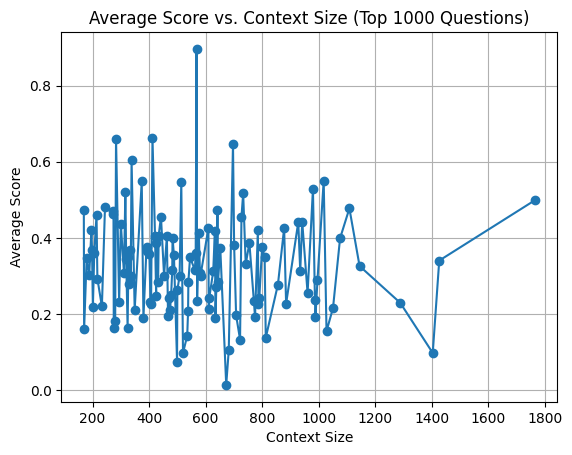

In [18]:
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

# Define the model and create the QA pipeline
model_name = "deepset/roberta-base-squad2"
nlp = pipeline("question-answering", model=model_name, tokenizer=model_name)

# Initialize dictionaries to store context sizes and their corresponding scores
context_scores_dict = {}

# Limit the analysis to the top 100 questions
num_questions_to_process = 1000

for i in range(num_questions_to_process):
    QA_input = {
        'question': dataset["validation"]["question"][i],
        'context': dataset["validation"]["context"][i]
    }
    res = nlp(QA_input)

    # Get the size (length) of the context
    context_size = len(QA_input['context'])

    # Append the score to the respective context size in the dictionary
    if context_size not in context_scores_dict:
        context_scores_dict[context_size] = []
    context_scores_dict[context_size].append(res['score'])

# Calculate the mean score for each context size
context_sizes = sorted(list(context_scores_dict.keys()))
average_scores = [np.mean(context_scores_dict[size]) for size in context_sizes]

# Create a line graph of context sizes vs. average scores
plt.plot(context_sizes, average_scores, marker='o', linestyle='-')

# Set plot labels and title
plt.xlabel('Context Size')
plt.ylabel('Average Score')
plt.title('Average Score vs. Context Size (Top 1000 Questions)')

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()


## Testing other models

In [19]:

pipe = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")
QA_input_normans_1 = {
    'question': 'Where do the normans come from? Do they have anything to do with spanish?',
    'context': context1
}
res = pipe(QA_input_normans_1 )
print(res)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'score': 0.32002660632133484, 'start': 144, 'end': 162, 'answer': 'Old Low Franconian'}
